In [24]:
import fastbook
import gradio as gr
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [14]:
person_types = 'fraudster','not_a_fraudster'
path = Path('Types')

In [15]:
fns = get_image_files(path)
fns

(#684) [Path('Types/fraudster/2023-05-18 21_37_01-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_02-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_03-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_04-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_05-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_06-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_08-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_09-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_10-Form1.png'),Path('Types/fraudster/2023-05-18 21_37_11-Form1.png')...]

In [16]:
person = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls = person.dataloaders(path)

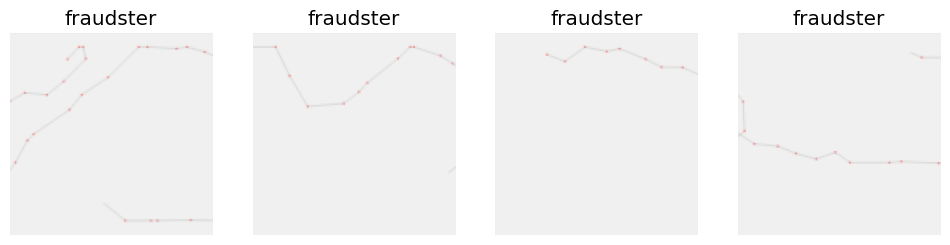

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

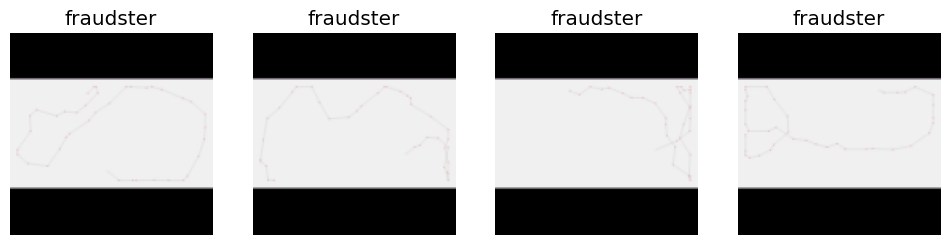

In [19]:
person = person.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = person.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

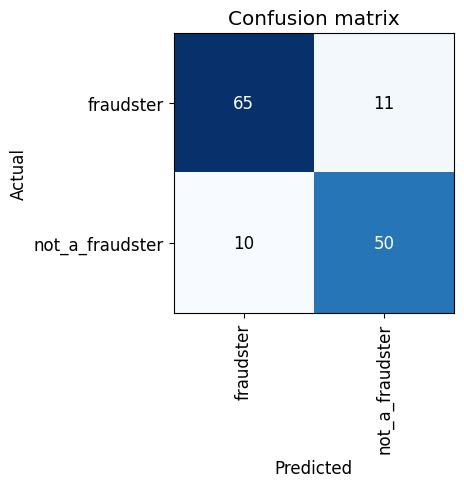

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

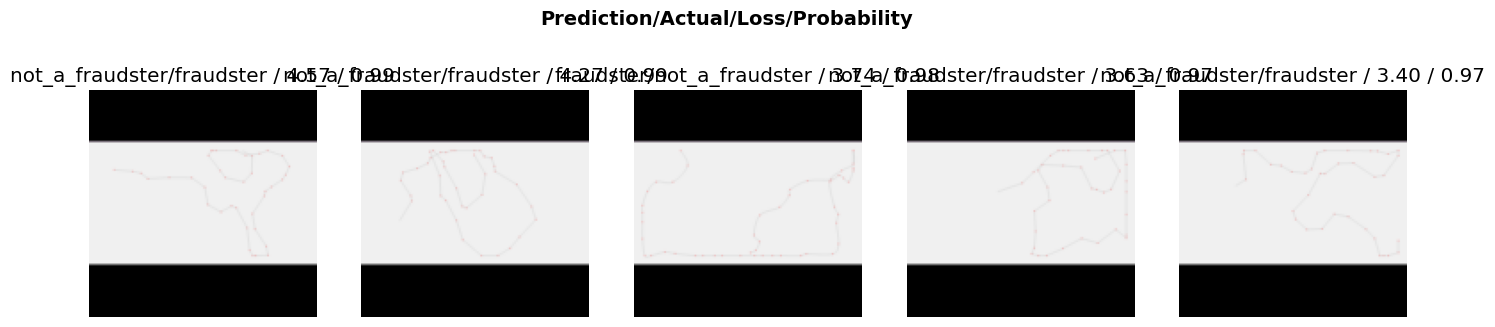

In [22]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [25]:
categories = ('fraudster', 'not_a_fraudster')
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [44]:
image = gr.inputs.Image(shape=(128, 128))
label = gr.outputs.Label()
examples = ['Test/image.png','Test/uno.png','Test/dos.png','Test/tres.png','Types/fraudster/2023-05-18 21_38_56-Form1.png','Test/2023-05-18 21_44_58-Form1.png', 'Test/2023-05-18 21_44_59-Form1.png', 'Test/2023-05-18 21_45_00-Form1.png', 'Test/2023-05-18 21_45_02-Form1.png', 'Test/2023-05-18 21_45_03-Form1.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

c:\Users\vityaatya\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\vityaatya\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
c:\Users\vityaatya\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\vityaatya\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.


In [23]:
learn.export('v2.pkl')